In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
df=pd.read_csv(r"C:\Users\ASUS\OneDrive\ドキュメント\housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
df.fillna(df['total_bedrooms'].median(),inplace=True)

In [5]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [6]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [7]:
#df.ocean_proximity.unique()
dict_1={'NEAR BAY':1,'<1H OCEAN':2,'INLAND':3,'NEAR OCEAN':4,'ISLAND':5}
df['ocean_proximity']=df['ocean_proximity'].replace(dict_1)
df





,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,3
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,3
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,3
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,3


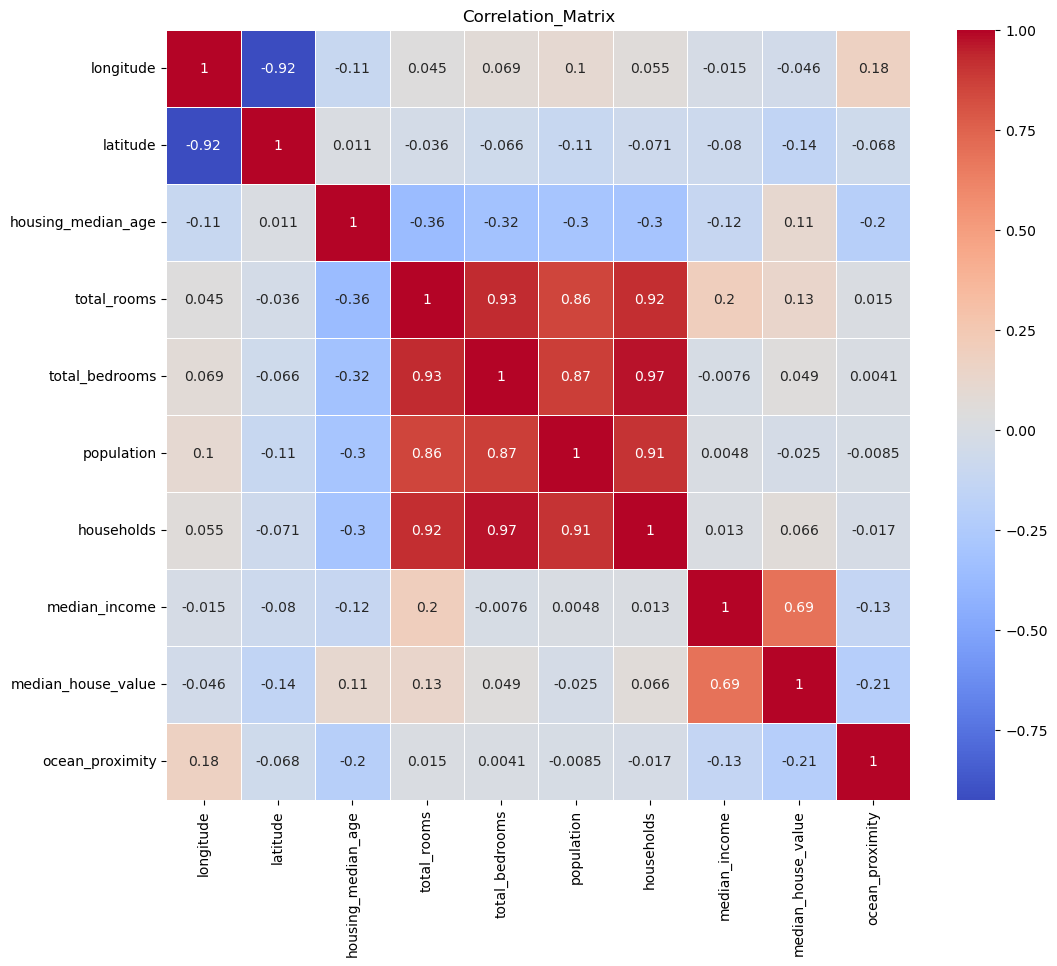

In [15]:
correlation=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation_Matrix')
plt.show()



In [26]:
x=df[['housing_median_age','total_rooms','median_income','households']]
y=df['median_house_value']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
Regressor=DecisionTreeRegressor(max_depth=5,random_state=42)
Regressor.fit(x_train,y_train)



DecisionTreeRegressor(max_depth=5, random_state=42)

In [29]:
y_pred=Regressor.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print('mean_square_error =',mse)

mean_square_error = 6158293744.776316


<function matplotlib.pyplot.show(close=None, block=None)>

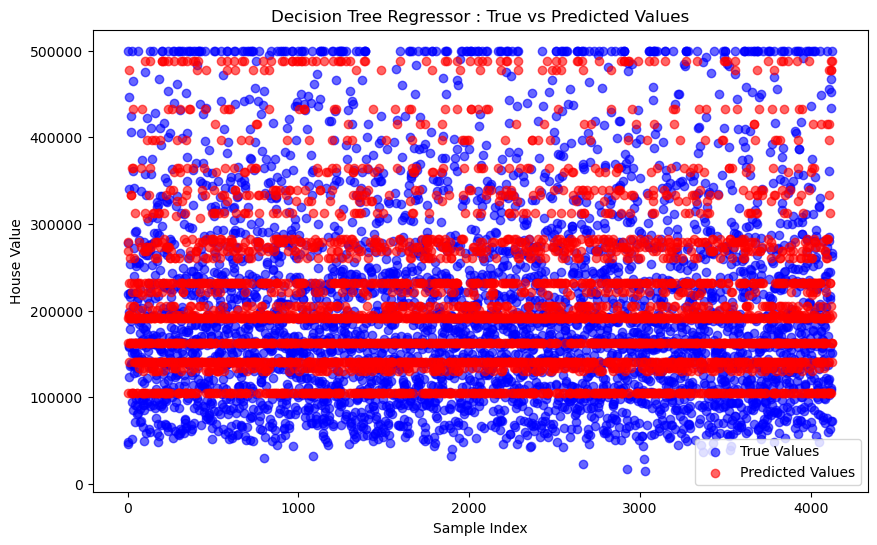

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)),y_test,color='blue',label='True Values',alpha=0.6)
plt.scatter(range(len(y_pred)),y_pred,color='red',label='Predicted Values',alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('House Value')
plt.title('Decision Tree Regressor : True vs Predicted Values')
plt.legend()
plt.show